In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import regex as re
import time

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent_r')

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

In [2]:
def extract_sizes_and_quantities(description):
    """
    Extract sizes and quantities of shirts from a description of the order.

    Parameters:
        description (str): Description of the order containing shirt sizes and quantities.

    Returns:
        dict: A dictionary containing the sizes as keys and their respective quantities as values.
    """
    pattern = r"(?i)\b(\d+)\s*(NP|NM|NGG?|NEXG|BLP|BLM|BLGG?|BLEXG)\b"
    matches = re.findall(pattern, description)
    print(matches)
    sizes_quantities = {size.upper(): int(quantity) for quantity, size in matches}
    return sizes_quantities

def calculate_shirt_sizes(file_path, model):
    """
    Calculate the total quantities of each shirt size from a given Excel file.

    Parameters:
        file_path (str): Path to the Excel file.

    Returns:
        dict: A dictionary containing the total quantities of each shirt size.
    """
    if model == 'NORMAIS':
      df = pd.read_excel(file_path, usecols="C", sheet_name="NORMAIS")

    elif model == 'POLOS':
      df = pd.read_excel(file_path, usecols="C", sheet_name="POLOS")

    sizes_quantities = {
        "BLP": 0,
        "BLM": 0,
        "BLG": 0,
        "BLGG": 0,
        "BLEXG": 0,
        "NP": 0,
        "NM": 0,
        "NG": 0,
        "NGG": 0,
        "NEXG": 0,
    }

    # Process each description of the order and sum the quantities of each shirt size
    for description in df["DESCRIÇÃO DO PEDIDO"]:
        sizes_quantities_description = extract_sizes_and_quantities(str(description))
        for size, quantity in sizes_quantities_description.items():
            sizes_quantities[size] += quantity

    return sizes_quantities

def plot_shirt_histogram(sizes_quantities, model):
    """
    Plot a histogram of shirt models based on their quantities.

    Parameters:
        sizes_quantities (dict): A dictionary containing the total quantities of each shirt size.

    Returns:
        None
    """
    # Create a dataframe from the sizes and quantities dictionary
    df = pd.DataFrame(list(sizes_quantities.items()), columns=['Modelo', 'Quantidade'])

    f, ax = plt.subplots(figsize=(14, 8))
    sns.histplot(data=df, x='Modelo', weights='Quantidade', kde=True, ax=ax)

    plt.xlabel('Modelo', fontsize=16)
    plt.ylabel('Quantidade', fontsize=16)
    plt.title(f'{model}', fontsize=20)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.show()

# NORMAIS

In [3]:
start_time = time.time()

# Example usage to calculate all shirt sizes
file_path = "/content/Camisetas - Doze de 2023.xlsx"  # Replace with the actual path to your Excel file
calculated_sizes = calculate_shirt_sizes(file_path, model='NORMAIS')

print("\n--- %s seconds ---" % (time.time() - start_time))

[]
[]
[('1', 'NM')]
[]
[]
[('1', 'NGG')]
[]
[]
[]
[]
[('1', 'NEXG')]
[]
[]
[('1', 'NG')]
[]
[('1', 'NGG'), ('1', 'NM')]
[]
[('1', 'NGG'), ('1', 'NG'), ('1', 'BLG')]
[]
[]
[]
[]
[]
[]
[]
[('1', 'NG')]
[]
[]
[]
[('1', 'NM')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('1', 'NP'), ('1', 'BLG')]
[]
[('1', 'NGG')]
[]
[]
[('1', 'NG')]
[]
[('1', 'NP')]
[('1', 'NM')]
[]
[('1', 'NP')]
[]
[]
[]
[]
[]
[('2', 'NM'), ('3', 'NG'), ('1', 'NGG')]
[('1', 'NG'), ('1', 'NGG')]
[('1', 'NG')]
[]
[('1', 'NG'), ('1', 'BLM'), ('1', 'BLP')]
[]
[('1', 'NGG')]
[]
[]
[]
[('1', 'NGG'), ('1', 'BLM')]
[('1', 'NEXG')]
[('1', 'NG'), ('1', 'BLM')]
[('1', 'NG')]
[('1', 'NG')]
[('1', 'NM'), ('1', 'BLM')]
[]
[('1', 'NG'), ('1', 'NP')]
[('1', 'NM'), ('1', 'NG'), ('1', 'BLM')]
[]
[('1', 'NM')]
[('1', 'NM')]
[]
[]
[]
[('1', 'NG')]
[('1', 'NG')]
[]
[]
[]
[('1', 'BLM'), ('1', 'NG')]
[]
[]
[('2', 'NM'), ('1', 'BLGG')]
[]
[]
[]
[]
[]
[('1', 'BLG')]
[]
[]
[]
[]
[]
[]
[]
[]
[('1', 'BLM')]
[('1', 'BLM')]
[]
[('1', 'NM')]
[]
[('3', 'NGG'), ('1'

In [4]:
start_time = time.time()

total_shirts = 0

for size, quantity in calculated_sizes.items():
    print(f"{size}: {quantity}")
    total_shirts += quantity

print('TOTAL:', total_shirts)
print("\n--- %s seconds ---" % (time.time() - start_time))

BLP: 2
BLM: 8
BLG: 6
BLGG: 2
BLEXG: 0
NP: 4
NM: 15
NG: 26
NGG: 11
NEXG: 2
TOTAL: 76

--- 0.0006113052368164062 seconds ---


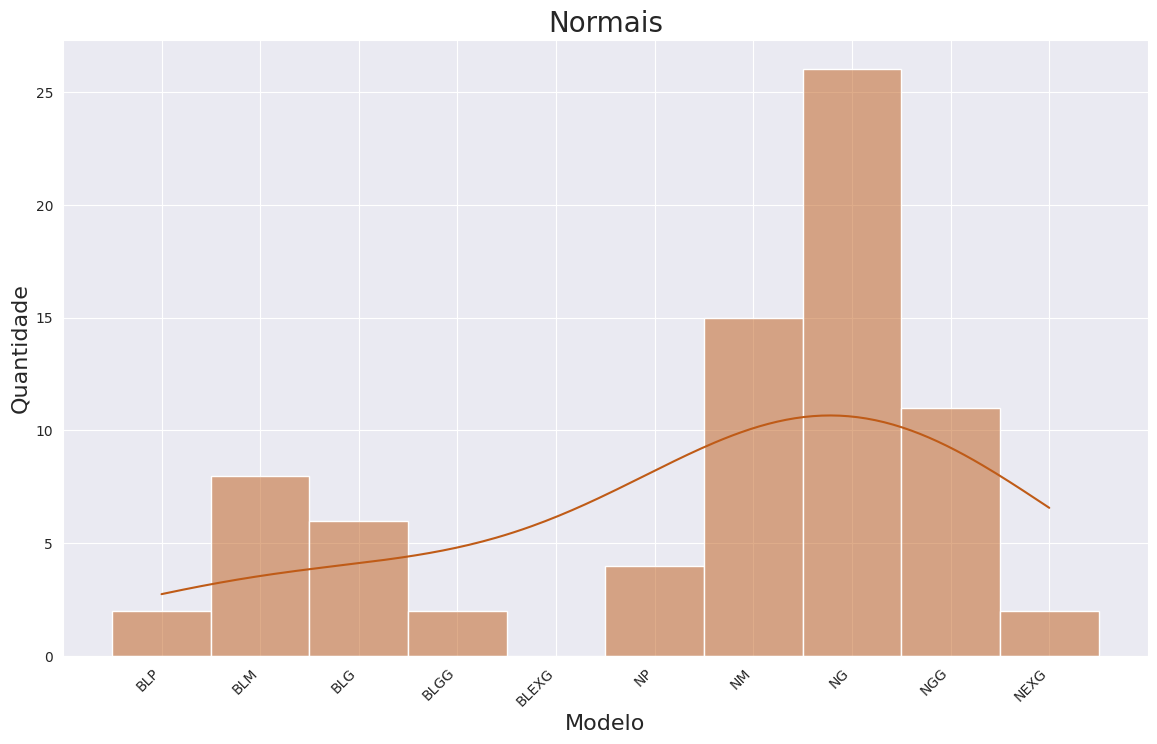


--- 0.9181008338928223 seconds ---


In [5]:
start_time = time.time()

plot_shirt_histogram(calculated_sizes, 'Normais')

print("\n--- %s seconds ---" % (time.time() - start_time))

# POLOS

In [6]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Blues_r')

In [7]:
start_time = time.time()

# Example usage to calculate all shirt sizes
file_path = "/content/Camisetas - Doze de 2023.xlsx"  # Replace with the actual path to your Excel file
calculated_sizes = calculate_shirt_sizes(file_path, model='POLOS')

print("\n--- %s seconds ---" % (time.time() - start_time))

[]
[]
[('1', 'NM')]
[]
[]
[('1', 'NGG')]
[]
[]
[]
[]
[]
[]
[]
[('1', 'NG')]
[]
[('1', 'NGG')]
[]
[('1', 'NGG')]
[]
[]
[]
[]
[]
[]
[]
[('1', 'NG')]
[]
[]
[]
[('1', 'NM')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('1', 'NG')]
[]
[('1', 'NP')]
[]
[]
[('1', 'NP')]
[]
[]
[]
[]
[]
[('1', 'NG')]
[]
[]
[]
[]
[]
[]
[]
[]
[('1', 'NM')]
[('1', 'NGG')]
[]
[]
[('1', 'NG')]
[]
[('1', 'NM')]
[]
[('1', 'NG')]
[('1', 'NM')]
[]
[('1', 'NM')]
[('1', 'NM')]
[]
[]
[]
[('1', 'NG')]
[]
[]
[]
[]
[('1', 'NG')]
[]
[]
[('1', 'NG')]
[]
[]
[]
[]
[]
[('1', 'NM')]
[]
[]
[]
[]
[]
[]
[]
[]
[('1', 'BLM')]
[('1', 'BLM')]
[]
[('1', 'NM')]
[]
[]
[]
[('1', 'NG')]
[('1', 'NG')]
[]
[]
[]
[]
[('1', 'NG')]
[('1', 'NG')]
[('1', 'NG')]
[]
[('2', 'NG'), ('1', 'NM')]
[]
[]

--- 0.16371440887451172 seconds ---


In [8]:
start_time = time.time()

total_shirts = 0

for size, quantity in calculated_sizes.items():
    print(f"{size}: {quantity}")
    total_shirts += quantity

print('TOTAL:', total_shirts)
print("\n--- %s seconds ---" % (time.time() - start_time))

BLP: 0
BLM: 2
BLG: 0
BLGG: 0
BLEXG: 0
NP: 2
NM: 10
NG: 16
NGG: 4
NEXG: 0
TOTAL: 34

--- 0.00042247772216796875 seconds ---


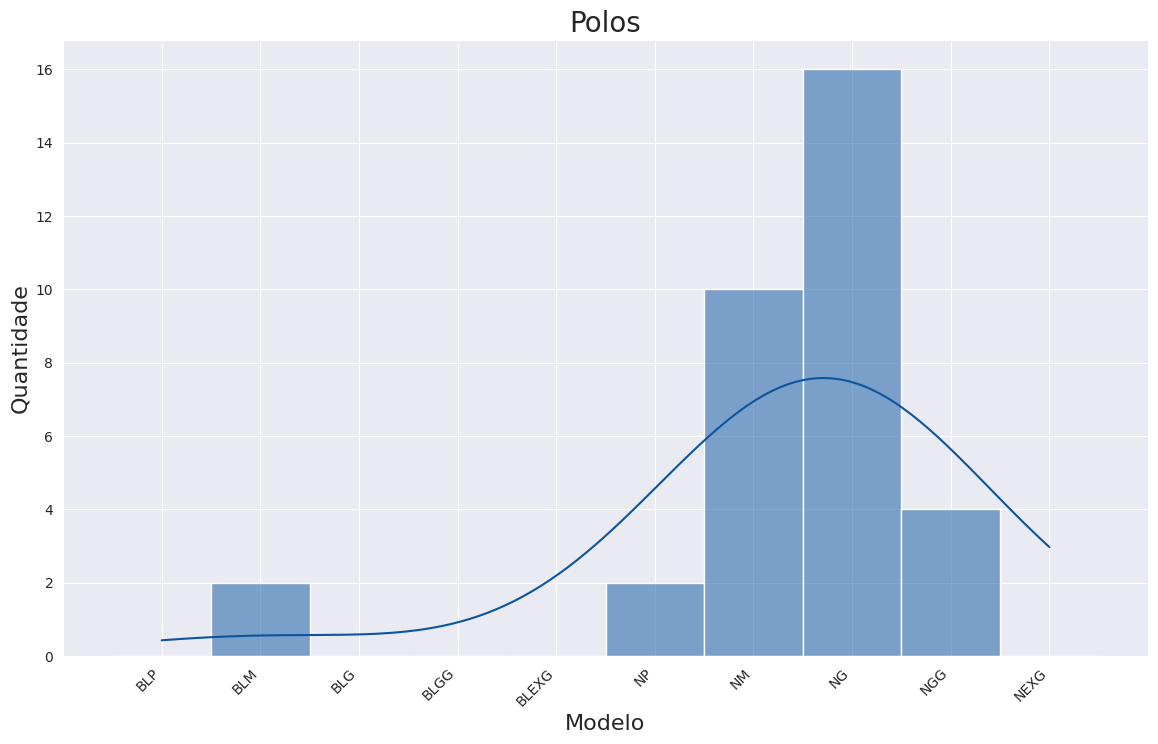


--- 1.0142416954040527 seconds ---


In [9]:
start_time = time.time()

plot_shirt_histogram(calculated_sizes, 'Polos')

print("\n--- %s seconds ---" % (time.time() - start_time))